In this problem set we utilised AI tools, mainly chatGPT for debugging code as we did not find the error messages on Julia very intuitive as to where the problem was and what the problem was. Additionally, used chatGPT to create a template for making an animation.

## Problem 1

Part a

In [73]:
using Interpolations 
using Plots
using Optim

In [74]:
# Setting up the four functions
f1(x) = exp(2*x+2)
f2(x) = min(max(-1, 4*(x-1/5)), 1)
f3(x) = -2*x^(-1/2)
f4(x) = 1/(1+x^2)

# Setting up what is required for Lagrange interpolation
function vandermonde(X)
    n = length(X)
    V = [xi^s for xi in X, s in 0:n-1]
    return V
end

lagrange(X, y) = vandermonde(X)\y

function evaluate(a, x)
    xi = 1
    v  = 0.0
    for ai in a
        v += ai * xi 
        xi *= x
    end
    return v
end

# Setiting up what is required for Chebyshev polynomials
T(n, x) = cos(n * acos(x))



T (generic function with 1 method)

The only way I found of making sure the animations were shown was writing each animation in it's own box, this meant making a loop to do this was not possible as it would only show the last animation. I could not find anything online about this either. So even though it looks like a lot of code and very messy, it is only two different animations created, one comparing the interpolation to the actual curve and the other showing the errors. And I have just copied reused the two functions to create all the animations. Also I changed the n for the error going from n largest to n smallest as this changes the error size from smallest to largest.

In [75]:
gr()
fps = 1
# We found it looked better when we started off with a larger n then looked at it getting smaller.
grid_size = (5, 10, 20, 50, 100)
errors_grid_size = (100, 50, 20, 10, 5)
ranges = [[-1, 1], [-1, 1], [1e-12, 1], [-5, 5]]
function plot_f_gif(f, range, filename, type)
    p1 = plot(title = "$type Interpolation on $f", legend=:bottomright, linestyle=:dash)
    # Generate x values for plotting
    xg = LinRange(range[1], range[2], 1000)
    plot!(p1, xg, f, label = raw"$f(x)$", legend=false)
    anim = Animation()

    for (j, n) in enumerate(grid_size)

        # Generate interpolation points
        x = LinRange(range[1], range[2], n)
        y = f.(x)
        if type == "Lagrange"
            a = lagrange(x, y)
            plot!(p1, xg, x -> evaluate(a, x), label = "n=$n", legend=false)

        elseif type == "Chebyshev"
            # Plot with Chebyshev
            m = n + 1
            a_val = range[1]
            b_val = range[2]
            z = [-cos((2k - 1)/(2m) * π) for k in 1:m] # interpolation points
            x_cheb = (z .+ 1) .* (b_val - a_val)/2 .+ a_val
            y_cheb = f.(x_cheb)
            c = [sum(y_cheb[k] * T(i, z[k]) for k in 1:m) / sum(T(i, z[k])^2 for k in 1:m) for i in 0:n]

            approx_cheb(x) = sum(ci * T(i, 2 * (x - a_val)/(b_val - a_val) - 1) for (ci, i) in zip(c, 0:n))
            plot!(p1, xg, approx_cheb, label = "n=$n", legend=false)
            
        elseif type == "Linear"
            # Linear Interpolation
            itp_linear = interpolate((x, ), y, Gridded(Linear()))
            plot!(p1, xg, itp_linear(xg), label = "n=$n", legend=false)

        elseif type == "Cubic"
            # Cubic Splines
            f̂ = CubicSplineInterpolation(x, y) 
            plot!(p1, xg, f̂.(xg), label = "n=$n", legend=false)
        end
        
        # Reset legend
        plot!(p1, legend=:bottomright)
        
        frame(anim)  # Save the frame
    end
    gif(anim, filename, fps=fps)  # Convert frames to animated gif

end

plot_f_gif (generic function with 1 method)

In [76]:
function plot_error_gif(f, range, filename, type)
    
    # Generate x values for plotting
    p2 = plot(title = "Error in $type interpolation on $f")
    xg = LinRange(range[1], range[2], 1000)
    anim = Animation()

    for (j, n) in enumerate(errors_grid_size)
        # Generate interpolation points
        x = LinRange(range[1], range[2], n)
        y = f.(x)

        if type == "Lagrange"
            a = lagrange(x, y)

            error_lagrange = f.(x) .- evaluate.(Ref(a), x)
            plot!(p2, x, error_lagrange, label="Error for n=$n", linestyle=:dash)

        elseif type == "Chebyshev"
            # Plot with Chebyshev
            m = n + 1
            a_val = range[1]
            b_val = range[2]
            z = [-cos((2k - 1)/(2m) * π) for k in 1:m] # interpolation points
            x_cheb = (z .+ 1) .* (b_val - a_val)/2 .+ a_val
            y_cheb = f.(x_cheb)
            c = [sum(y_cheb[k] * T(i, z[k]) for k in 1:m) / sum(T(i, z[k])^2 for k in 1:m) for i in 0:n]

            approx_cheb(x) = sum(ci * T(i, 2 * (x - a_val)/(b_val - a_val) - 1) for (ci, i) in zip(c, 0:n))

            error_cheb = f.(xg) .- approx_cheb.(xg)
            plot!(p2, xg, error_cheb, label="Error for n=$n", linestyle=:dash)
        
        elseif type == "Linear"
            # Linear Interpolation
            itp_linear = interpolate((x, ), y, Gridded(Linear()))

            error_linear = f.(xg) .- itp_linear(xg)
            plot!(p2, xg, error_linear, label="Error for n=$n", linestyle=:dash)

        elseif type == "Cubic"
            # Cubic Splines
            f̂ = CubicSplineInterpolation(x, y) 

            error_cubic = f.(xg) .- f̂(xg)
            plot!(p2, xg, error_cubic, label="Error for n=$n", linestyle=:dash)

        end
        # Reset legend
        plot!(p2, legend=:bottomright)
        
        frame(anim)  # Save the frame

end

gif(anim, filename, fps=fps)  # Convert frames to animated gif
end

plot_error_gif (generic function with 1 method)

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_lagrange.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_lagrange.gif")
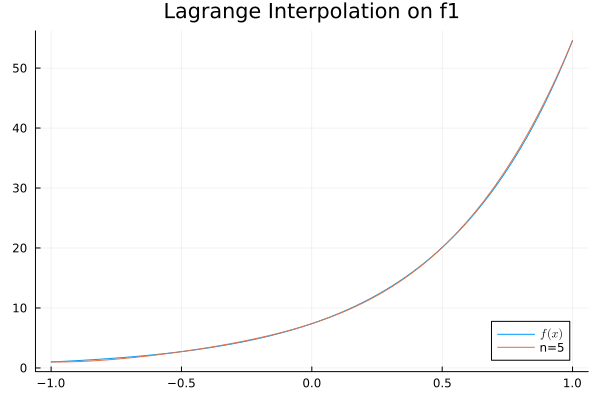

In [77]:
plot_f_gif(f1, ranges[1], "f1_lagrange.gif", "Lagrange")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_lagrange_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_lagrange_error.gif")
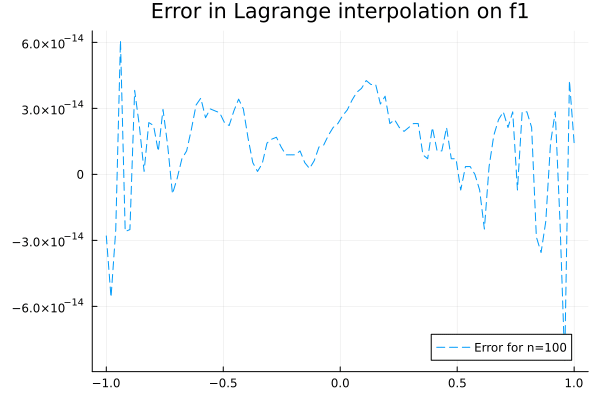

In [78]:
plot_error_gif(f1, ranges[1], "f1_lagrange_error.gif", "Lagrange")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_lagrange.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_lagrange.gif")
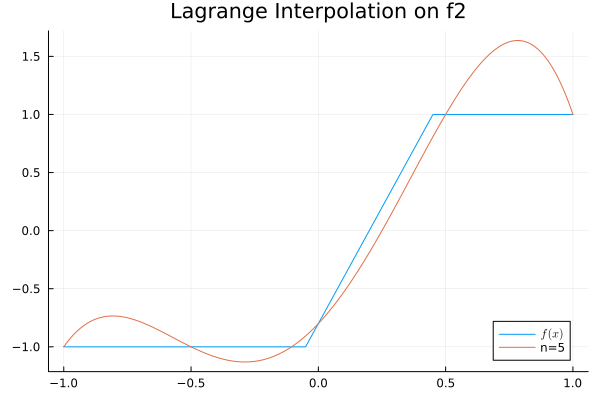

In [79]:
plot_f_gif(f2, ranges[2], "f2_lagrange.gif", "Lagrange")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_lagrange_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_lagrange_error.gif")
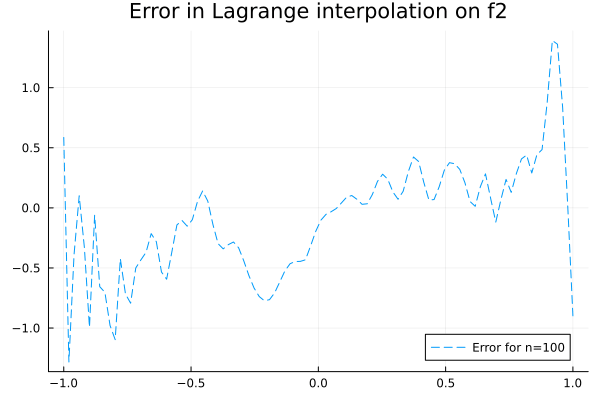

In [80]:
plot_error_gif(f2, ranges[2], "f2_lagrange_error.gif", "Lagrange")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_lagrange.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_lagrange.gif")
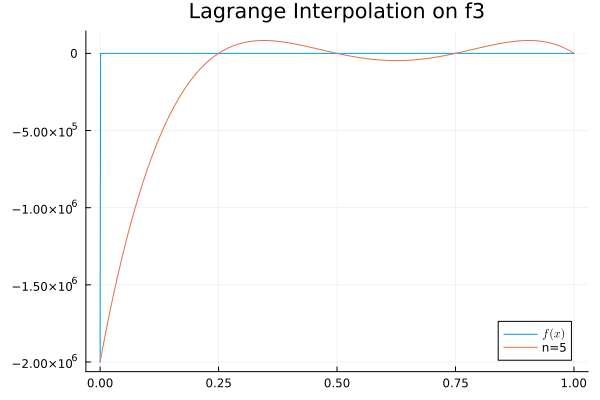

In [81]:
plot_f_gif(f3, ranges[3], "f3_lagrange.gif", "Lagrange")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_lagrange_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_lagrange_error.gif")
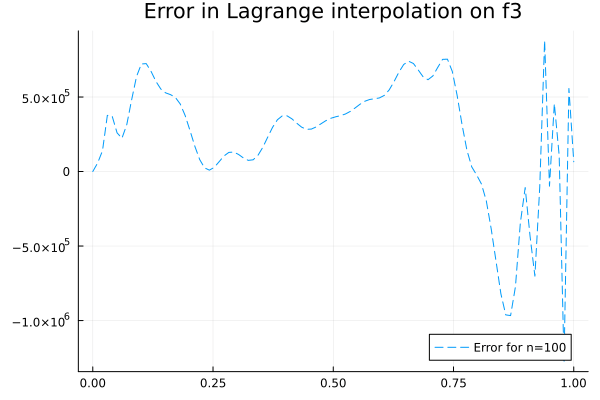

In [82]:
plot_error_gif(f3, ranges[3], "f3_lagrange_error.gif", "Lagrange")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_lagrange.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_lagrange.gif")
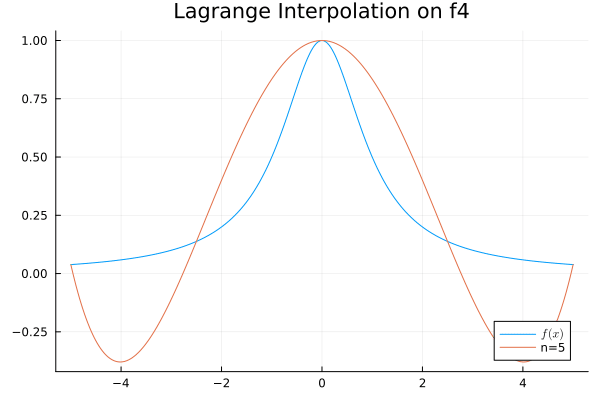

In [83]:
plot_f_gif(f4, ranges[4], "f4_lagrange.gif", "Lagrange")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_lagrange_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_lagrange_error.gif")
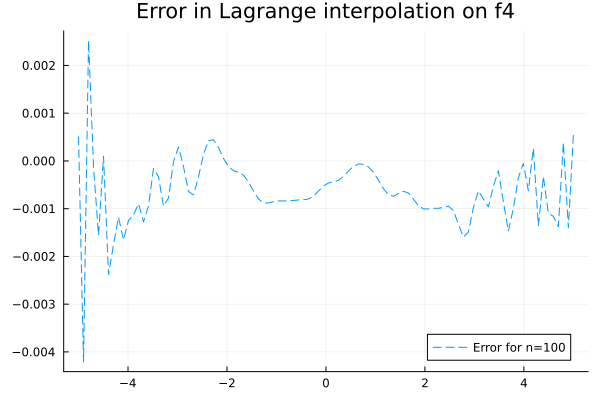

In [84]:
plot_error_gif(f4, ranges[4], "f4_lagrange_error.gif", "Lagrange")

For the Lagrange polynomials, we see divergent behaviour in the deviations from the actual value of f(x) as n increases with very large osciallations at the bounds. It can be shown that the Lagrange interpolation will never converge, and increasing n does not fix the problem, this is known the the Runge phenomenom.

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_chebyshev.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_chebyshev.gif")
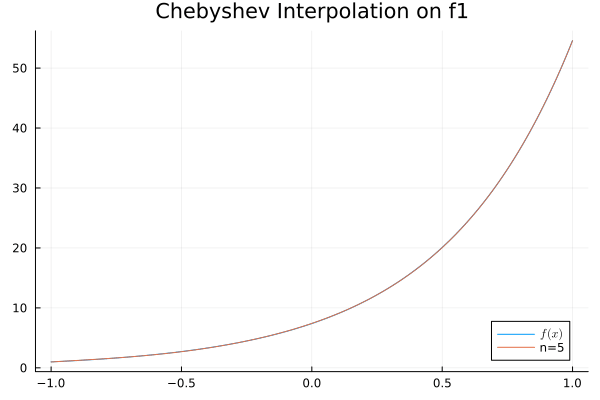

In [85]:
plot_f_gif(f1, ranges[1], "f1_chebyshev.gif", "Chebyshev")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_chebyshev_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_chebyshev_error.gif")
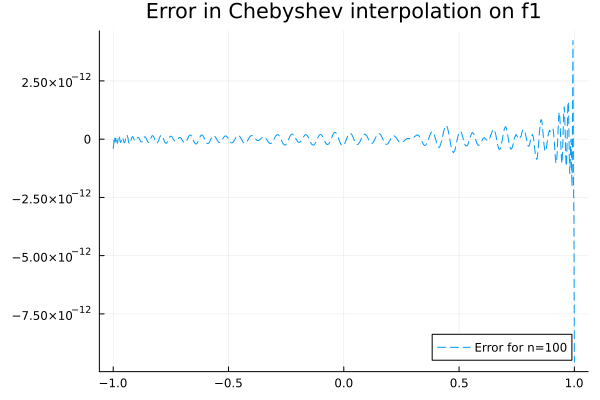

In [86]:
plot_error_gif(f1, ranges[1], "f1_chebyshev_error.gif", "Chebyshev")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_chebyshev.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_chebyshev.gif")
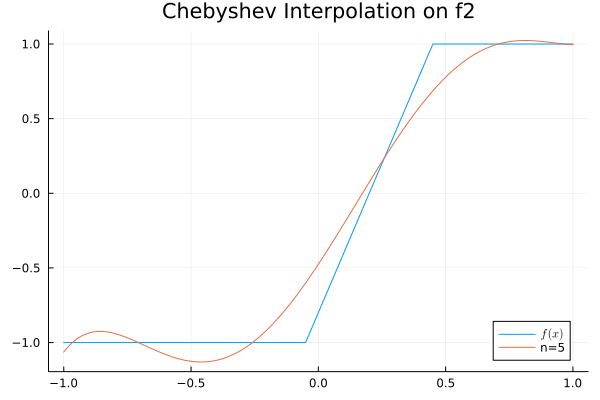

In [87]:
plot_f_gif(f2, ranges[2], "f2_chebyshev.gif", "Chebyshev")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_chebyshev_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_chebyshev_error.gif")
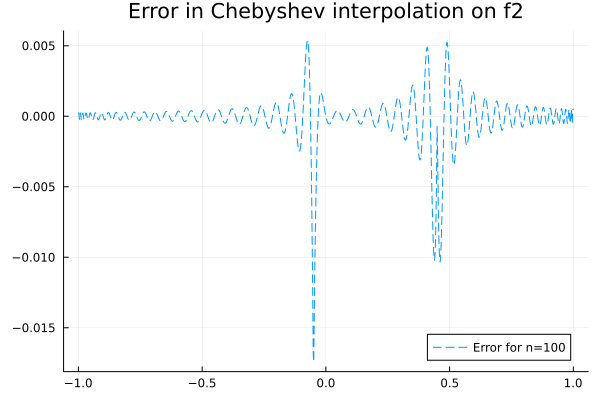

In [88]:
plot_error_gif(f2, ranges[2], "f2_chebyshev_error.gif", "Chebyshev")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_chebyshev.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_chebyshev.gif")
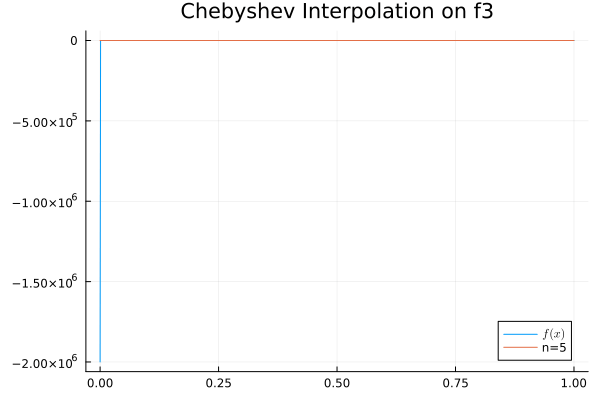

In [89]:
plot_f_gif(f3, ranges[3], "f3_chebyshev.gif", "Chebyshev")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_chebyshev_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_chebyshev_error.gif")
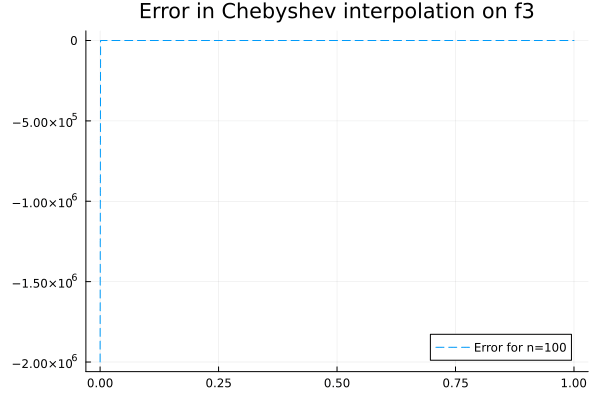

In [90]:
plot_error_gif(f3, ranges[3], "f3_chebyshev_error.gif", "Chebyshev")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_chebyshev.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_chebyshev.gif")
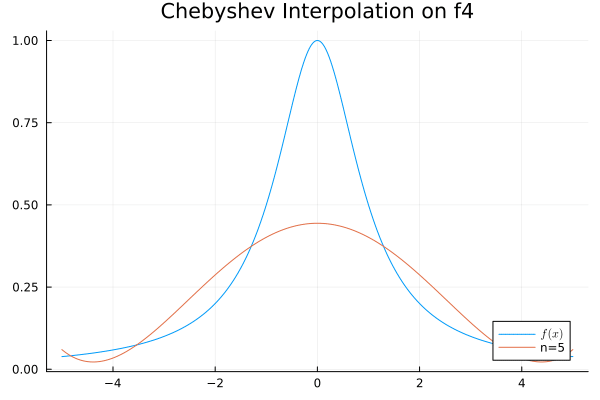

In [91]:
plot_f_gif(f4, ranges[4], "f4_chebyshev.gif", "Chebyshev")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_chebyshev_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_chebyshev_error.gif")
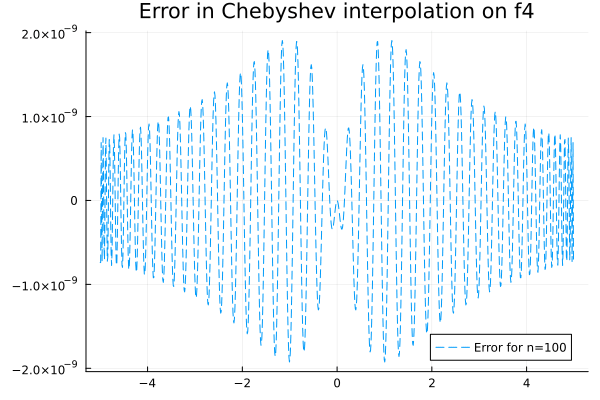

In [92]:
plot_error_gif(f4, ranges[4], "f4_chebyshev_error.gif", "Chebyshev")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_linear.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_linear.gif")
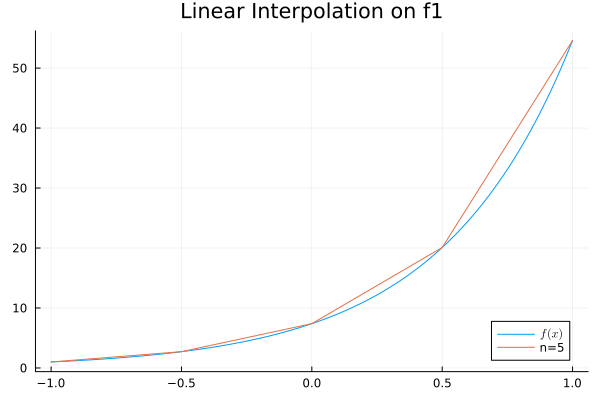

In [93]:
plot_f_gif(f1, ranges[1], "f1_linear.gif", "Linear")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_linear_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_linear_error.gif")
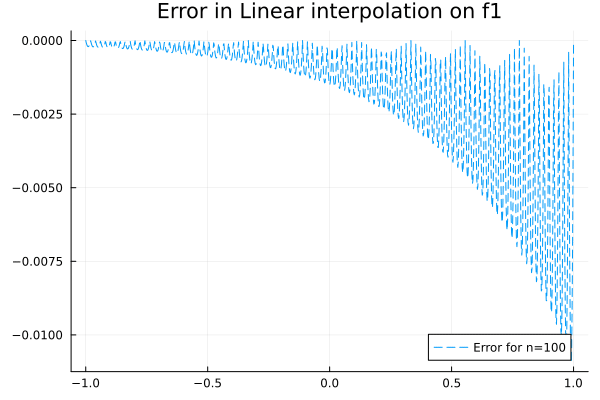

In [94]:
plot_error_gif(f1, ranges[1], "f1_linear_error.gif", "Linear")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_linear.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_linear.gif")
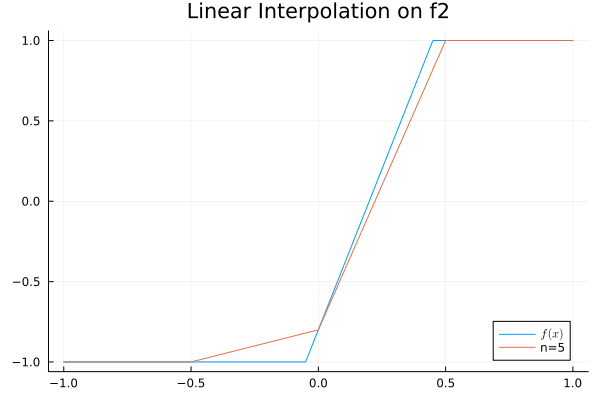

In [95]:
plot_f_gif(f2, ranges[2], "f2_linear.gif", "Linear")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_linear_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_linear_error.gif")
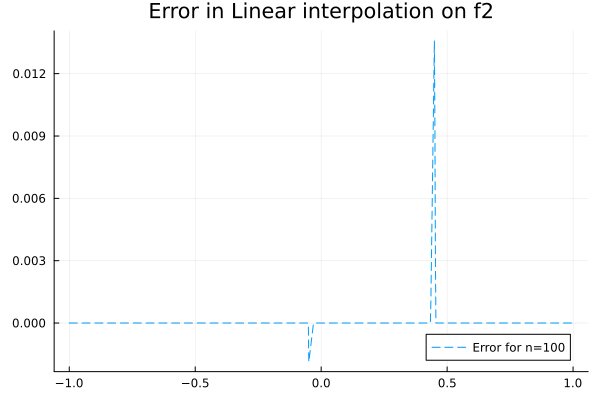

In [96]:
plot_error_gif(f2, ranges[2], "f2_linear_error.gif", "Linear")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_linear.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_linear.gif")
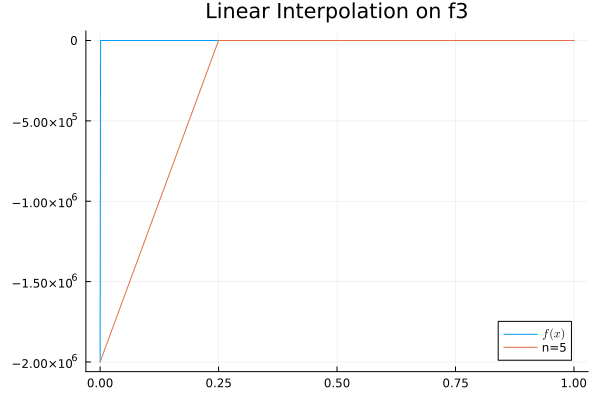

In [97]:
plot_f_gif(f3, ranges[3], "f3_linear.gif", "Linear")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_linear_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_linear_error.gif")
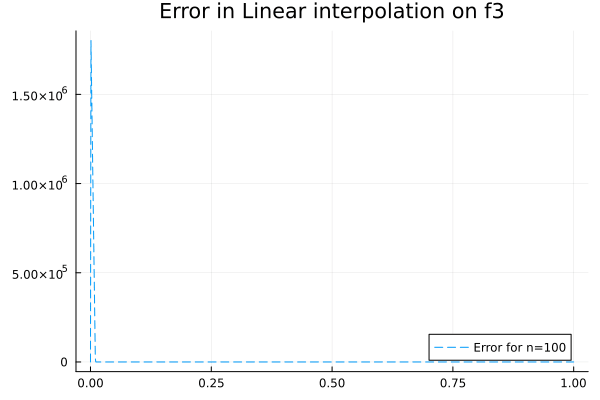

In [98]:
plot_error_gif(f3, ranges[3], "f3_linear_error.gif", "Linear")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_linear.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_linear.gif")
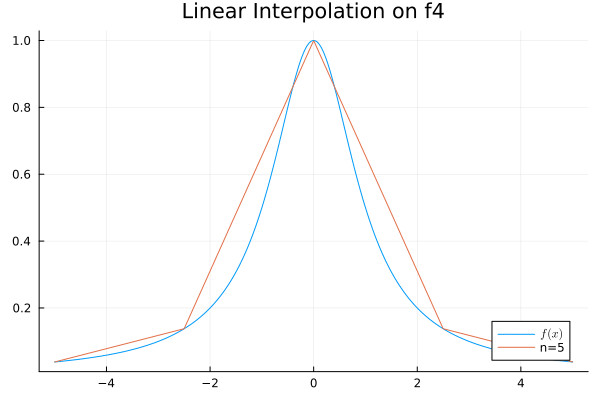

In [99]:
plot_f_gif(f4, ranges[4], "f4_linear.gif", "Linear")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_linear_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_linear_error.gif")
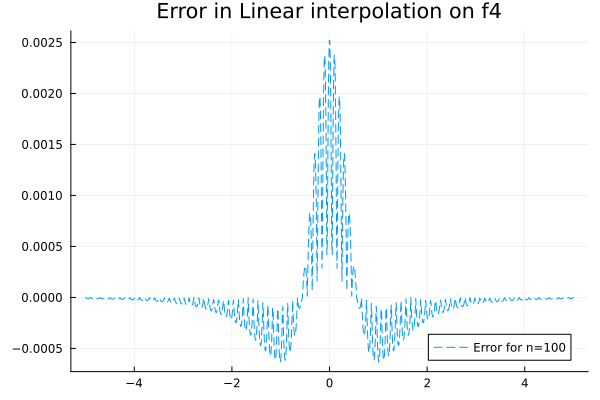

In [100]:
plot_error_gif(f4, ranges[4], "f4_linear_error.gif", "Linear")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_cubic.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_cubic.gif")
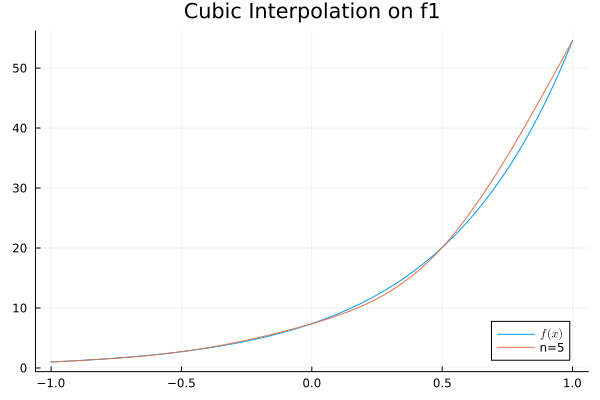

In [101]:
plot_f_gif(f1, ranges[1], "f1_cubic.gif", "Cubic")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f1_cubic_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f1_cubic_error.gif")
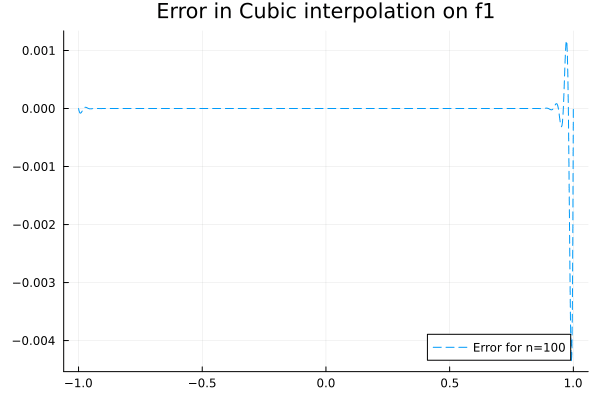

In [102]:
plot_error_gif(f1, ranges[1], "f1_cubic_error.gif", "Cubic")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_cubic.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_cubic.gif")
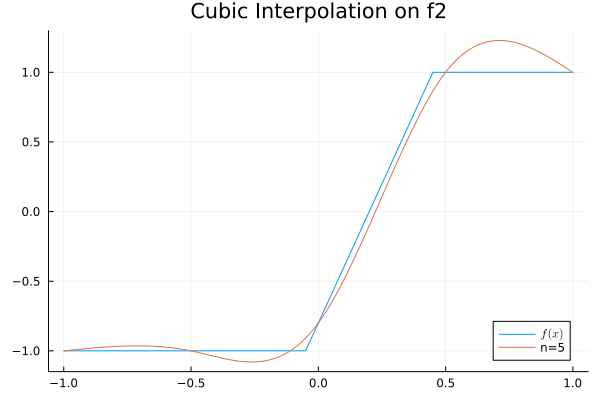

In [103]:
plot_f_gif(f2, ranges[2], "f2_cubic.gif", "Cubic")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f2_cubic_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f2_cubic_error.gif")
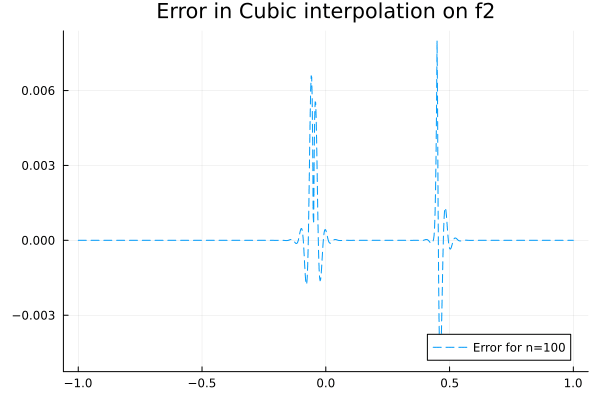

In [104]:
plot_error_gif(f2, ranges[2], "f2_cubic_error.gif", "Cubic")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_cubic.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_cubic.gif")
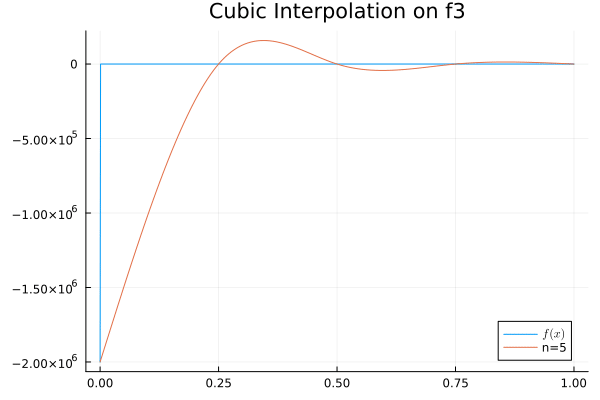

In [105]:
plot_f_gif(f3, ranges[3], "f3_cubic.gif", "Cubic")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f3_cubic_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f3_cubic_error.gif")
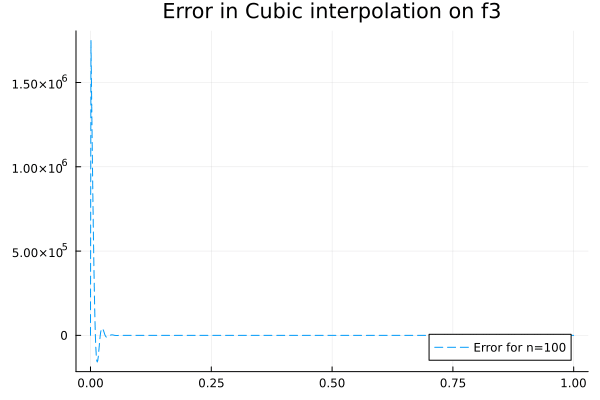

In [106]:
plot_error_gif(f3, ranges[3], "f3_cubic_error.gif", "Cubic")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_cubic.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_cubic.gif")
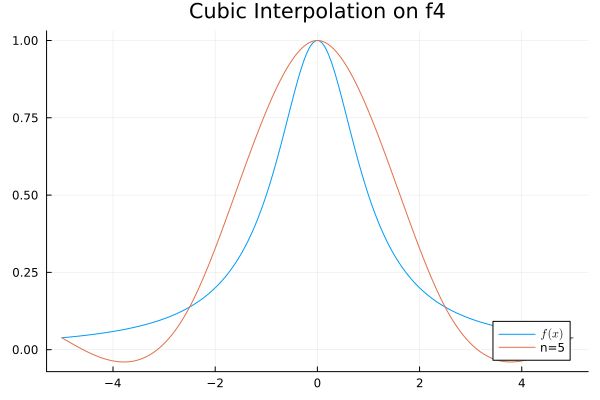

In [107]:
plot_f_gif(f4, ranges[4], "f4_cubic.gif", "Cubic")

┌ Info: Saved animation to c:\Users\reube\OneDrive\Desktop\Econ_programming\f4_cubic_error.gif
└ @ Plots C:\Users\reube\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\reube\\OneDrive\\Desktop\\Econ_programming\\f4_cubic_error.gif")
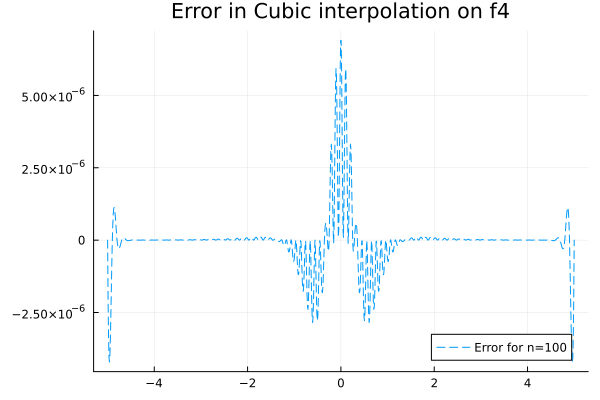

In [108]:
plot_error_gif(f4, ranges[4], "f4_cubic_error.gif", "Cubic")

Part b

In [109]:
function errors_f(f, n, a, b)
    errors_lagrangian = []
    errors_cheb = []
    errors_linear = []
    errors_cubic = []
    for n_value in n
        # Generate evaluation points
        xg = LinRange(a, b, 1000)
        x = LinRange(a, b, n_value)
        y = f.(x)
        # Lagrange Interpolation
        approx_lagrange = lagrange(x, y)
        interp_lagrange_values = evaluate.(Ref(approx_lagrange), xg)
        error_lagrange = sum(abs2, f.(xg) .- interp_lagrange_values) / 1000
        push!(errors_lagrangian, error_lagrange)

        # Chebyshev Interpolation
        m = n_value + 1
        z = [cos((2k - 1)/(2m) * π) for k in 1:m]
        x_cheb = (z .+ 1) .* (b - a) / 2 .+ a
        y_cheb = f.(x_cheb)
        c = [sum(y_cheb[k] * T(i, z[k]) for k in 1:m) / sum(T(i, z[k])^2 for k in 1:m) for i in 0:n_value]
        approx_cheb(x) = sum(ci * T(i, 2 * (x - a) / (b - a) - 1) for (ci, i) in zip(c, 0:n_value))
        error_cheb = sum(abs2, f.(xg) .- approx_cheb.(xg)) / 1000
        push!(errors_cheb, error_cheb)


        # Linear Interpolation
        itp_linear = interpolate((x,), y, Gridded(Linear()))
        error_linear = sum(abs2, f.(xg) .- itp_linear(xg)) / 1000
        push!(errors_linear, error_linear)

        # Cubic Splines Interpolation
        f̂ = CubicSplineInterpolation(x, y)
        error_cubic = sum(abs2, f.(xg) .- f̂.(xg)) / 1000
        push!(errors_cubic, error_cubic)
    end  
    return errors_lagrangian, errors_cheb, errors_linear, errors_cubic
end

errors_f (generic function with 1 method)

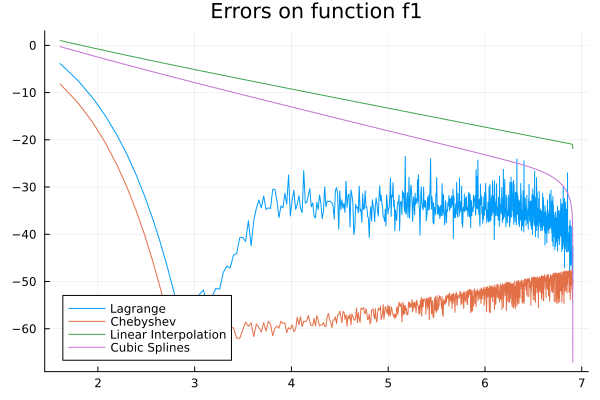

In [110]:
n = [i for i in 5:1000]
# For f1
lagrange_error, cheb_error, linear_error, cubic_error = errors_f(f1, n, -1, 1)
p = plot(title = "Errors on function f1")
plot!(log.(n), log.(lagrange_error), label="Lagrange")
plot!(log.(n), log.(cheb_error), label="Chebyshev")
plot!(log.(n), log.(linear_error), label="Linear Interpolation")
plot!(log.(n), log.(cubic_error), label="Cubic Splines")
display(p)

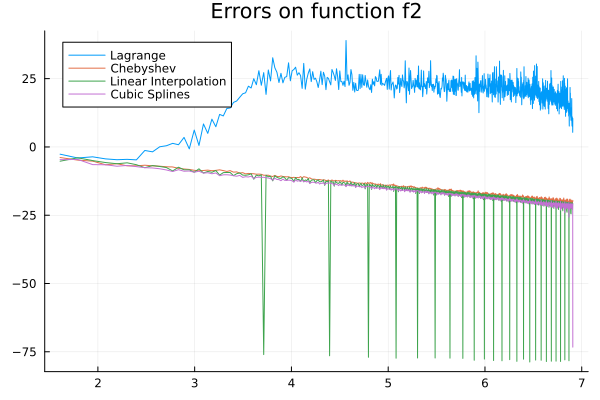

In [111]:
# For f2
lagrange_error, cheb_error, linear_error, cubic_error = errors_f(f2, n, -1, 1)
p = plot(title = "Errors on function f2")
plot!(log.(n), log.(lagrange_error), label="Lagrange")
plot!(log.(n), log.(cheb_error), label="Chebyshev")
plot!(log.(n), log.(linear_error), label="Linear Interpolation")
plot!(log.(n), log.(cubic_error), label="Cubic Splines")
display(p)

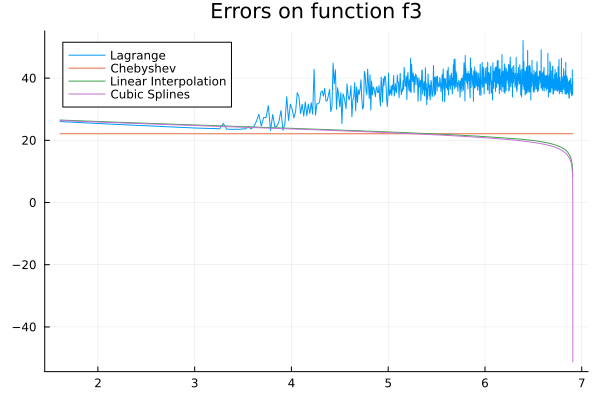

In [112]:
# For f3 not working because at 0, f3 is -infinity so using 1e-12 instead to replicate 0
lagrange_error, cheb_error, linear_error, cubic_error = errors_f(f3, n, 1e-12, 1)
p = plot(title = "Errors on function f3")
plot!(log.(n), log.(lagrange_error), label="Lagrange")
plot!(log.(n), log.(cheb_error), label="Chebyshev")
plot!(log.(n), log.(linear_error), label="Linear Interpolation")
plot!(log.(n), log.(cubic_error), label="Cubic Splines")
display(p)

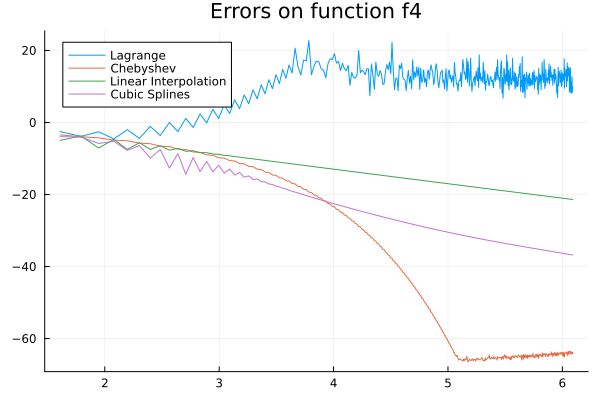

In [113]:
# For f4
# Lagrange method stops working after n greater than 442
n = [i for i in 5:442]

lagrange_error, cheb_error, linear_error, cubic_error = errors_f(f4, n, -5, 5)
p = plot(title = "Errors on function f4")
plot!(log.(n), log.(lagrange_error), label="Lagrange")
plot!(log.(n), log.(cheb_error), label="Chebyshev")
plot!(log.(n), log.(linear_error), label="Linear Interpolation")
plot!(log.(n), log.(cubic_error), label="Cubic Splines")
display(p)

## Problem 2

Part a

In [114]:
# Define parameters
a = -10
b = 0.5
alpha = 1/2
beta = 0.9

# Define the function v(k)
function v(k,; a=-10.0, b=0.5)
    return a + b * log(k)
end

# Define the optimization problem
function optimization_problem(k_prime, k,; a=-10.0, b=0.5, alpha=1/2, beta=0.9)
    # k_prime is initially in an array so making sure we are just calling the number
    k_prime = k_prime[1]
    c = k^alpha - k_prime
    return - (log(c) + beta * v(k_prime, a=a, b=b))
end

# Define the minimizer function
function minimiser(k,; a=-10.0, b=0.5, alpha=1/2)
    k_prime_init = [0.5 * k^alpha]
    lower_bounds = [0.0]
    upper_bounds = [k^alpha]
    function_to_minimise = k_prime -> optimization_problem(k_prime, k, a=a, b=b)
    result = optimize(function_to_minimise, lower_bounds, upper_bounds, k_prime_init)
    # Returning optimal c, k_prime
    c_optimal = k^alpha - result.minimizer[1]
    return (-result.minimum, result.minimizer[1])
end


minimiser (generic function with 1 method)

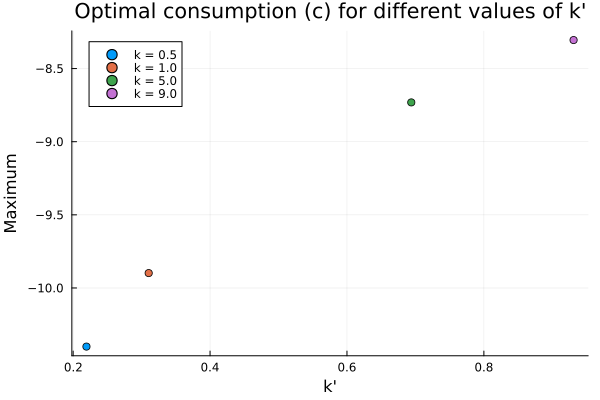

In [115]:
# Test the function for different values of k
k_values = [0.5, 1, 5, 9]
plot()
for k in k_values
    max, k_prime_optimal = minimiser(k)
    scatter!([k_prime_optimal], [max], label="k = $k", xlabel="k'", ylabel="Maximum")
end
plot!(title="Optimal consumption (c) for different values of k'")

Part b

In [116]:
function chebyshev_interpolation_v(k, n)
    # Generate evaluation points
    x = LinRange(1e-6, 10, n)
    y = v.(x)

    m = n + 1
    a_val = 1e-6
    b_val = 10
    z = [-cos((2k - 1)/(2m) * π) for k in 1:m] # interpolation points

    x_cheb = (z .+ 1) .* (b_val - a_val)/2 .+ a_val
    y_cheb = v.(x_cheb)
    c = [sum(y_cheb[k] * T(i, z[k]) for k in 1:m) / sum(T(i, z[k])^2 for k in 1:m) for i in 1:m]
    approx_cheb(x) = sum(ci * T(i, 2 * (x - 1e-6) ./ (10 - 1e-6) -1) for (ci, i) in zip(c, 1:m))

    return approx_cheb
end



function linear_interpolation_v(k, n)
    x = LinRange(1e-4, 10, n)
    y = v.(x)
    return interpolate((x,), y, Gridded(Linear()))
end

function cubic_interpolation_v(k, n)
    x = LinRange(1e-6, 10, n)
    y = v.(x)
    return CubicSplineInterpolation(x, y)
end
# Define the optimization problem
function optimization_problem_v_hat(k_prime, k, method, n, alpha=1/2, beta=0.9)
    # k_prime is initially in an array so making sure we are just calling the number
    k_prime = k_prime[1]
    c = k^alpha - k_prime

    approx_method = method(k_prime, n)
    #println(approx_method)
    return - (log(c) + beta * approx_method(k_prime))
end

# Define the minimizer function
function minimiser_v_hat(k, method, n, alpha=1/2)
    k_prime_init = [0.5 * k^alpha]
    lower_bounds = [0.0]
    upper_bounds = [k^alpha]
    function_to_minimise = k_prime -> optimization_problem_v_hat(k_prime, k, method, n)
    result = optimize(function_to_minimise, lower_bounds, upper_bounds, k_prime_init)
    # Returning optimal c, k_prime
    c_optimal = k^alpha - result.minimizer[1]
    return (-result.minimum, result.minimizer[1])
end


minimiser_v_hat (generic function with 2 methods)

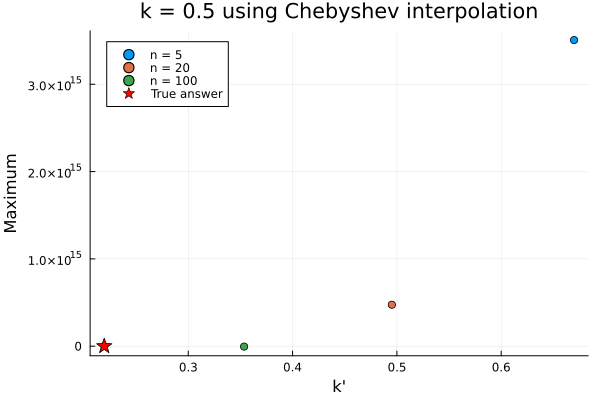

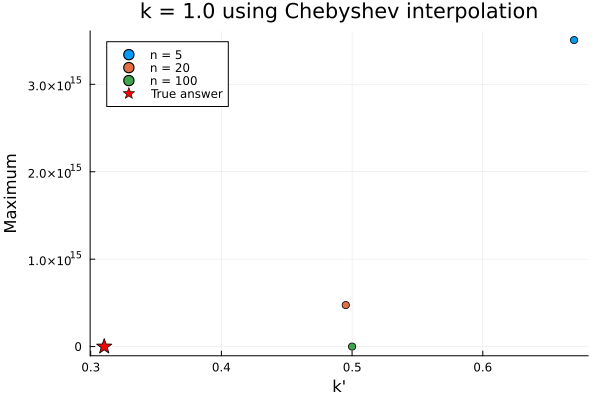

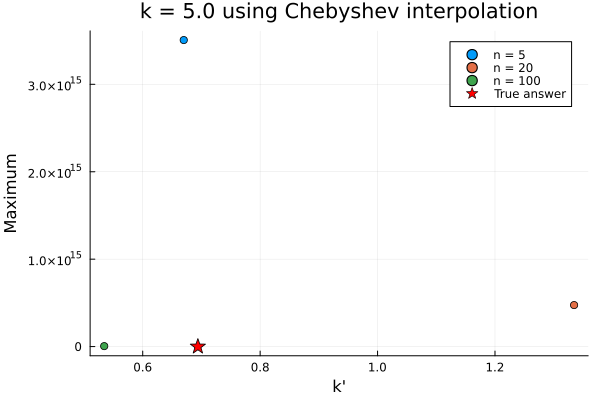

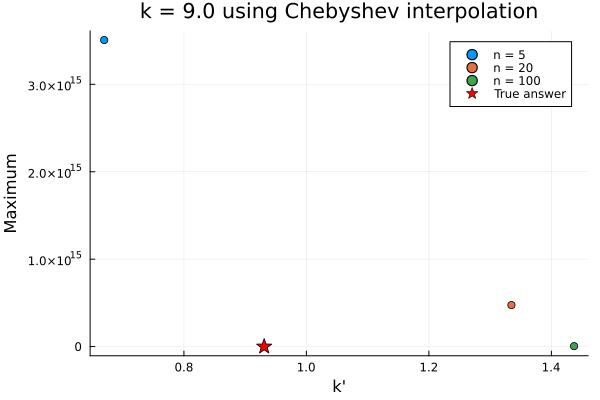

In [117]:

# Test the function for different values of k
k_values = [0.5, 1, 5, 9]
n_values = [5, 20, 100]

for k in k_values
    p = plot()
    for n in n_values
        max, k_prime_optimal = minimiser_v_hat(k, chebyshev_interpolation_v, n)
        scatter!([k_prime_optimal], [max], label="n = $n", xlabel="k'", ylabel="Maximum")
    end
    real_max, real_k_prime_optimal = minimiser(k)
    scatter!([real_k_prime_optimal], [real_max], label="True answer", xlabel="k'", ylabel="Maximum", shape=:star5, markersize=8, color=:red)
    plot!(title="k = $k using Chebyshev interpolation")
    display(p)
end


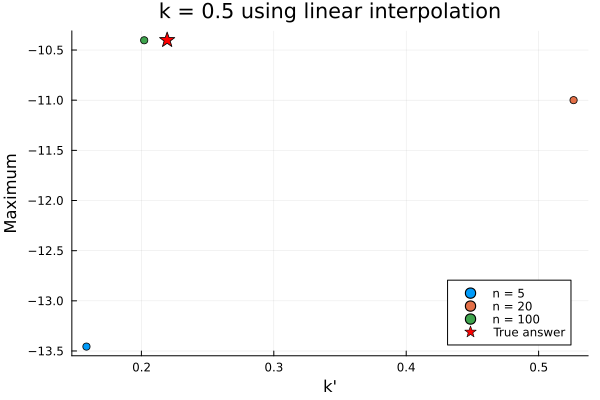

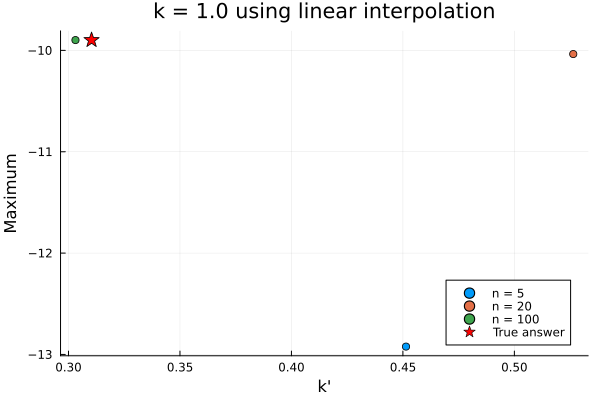

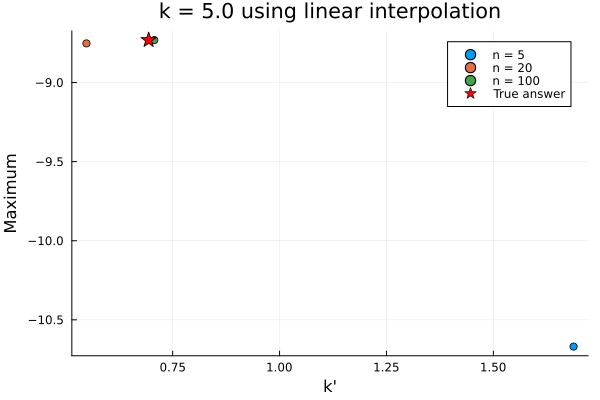

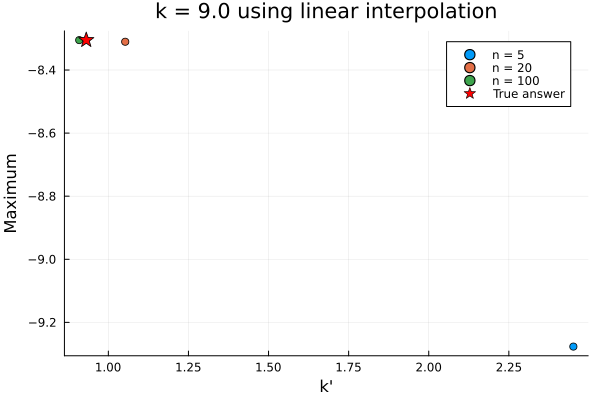

In [118]:
for k in k_values
    p = plot()
    for n in n_values
        max, k_prime_optimal = minimiser_v_hat(k, linear_interpolation_v, n)
        scatter!([k_prime_optimal], [max], label="n = $n", xlabel="k'", ylabel="Maximum")
    end
    real_max, real_k_prime_optimal = minimiser(k)
    scatter!([real_k_prime_optimal], [real_max], label="True answer", xlabel="k'", ylabel="Maximum", shape=:star5, markersize=8, color=:red)
    plot!(title="k = $k using linear interpolation")
    display(p)
end

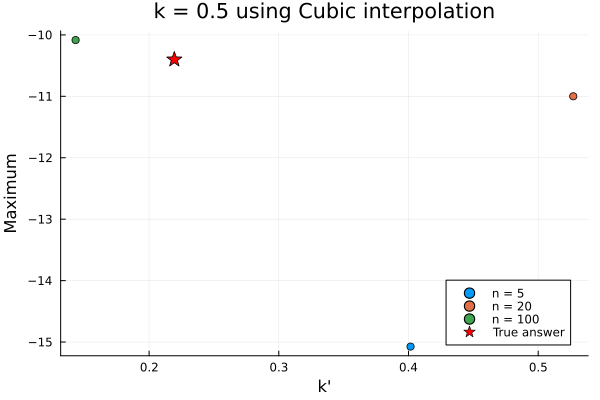

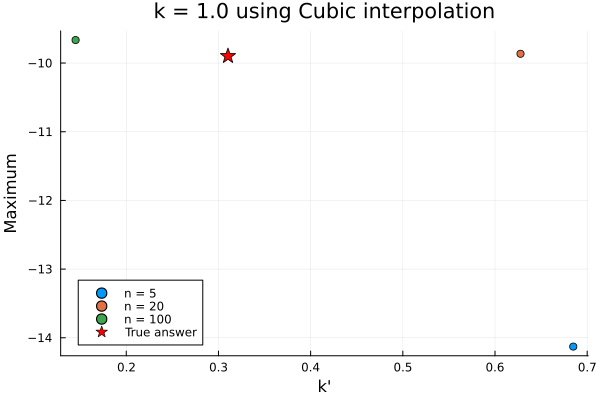

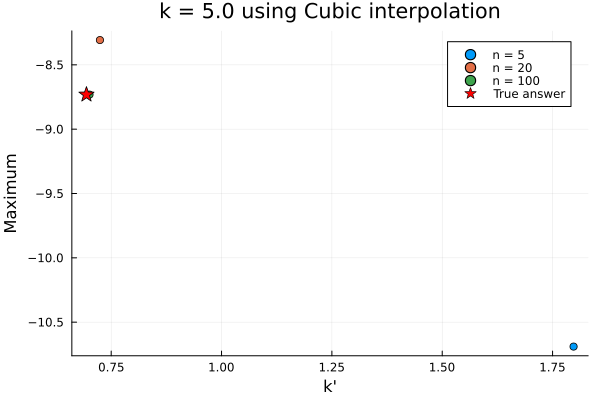

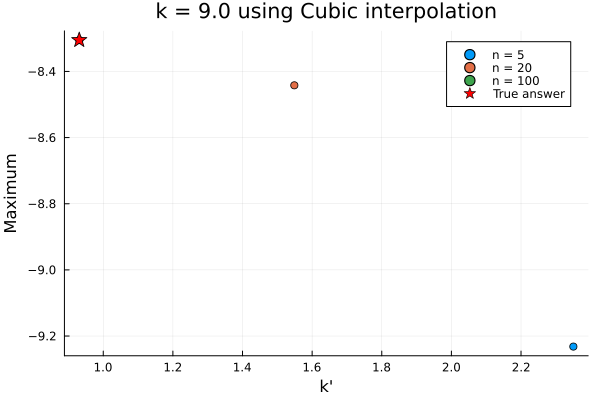

In [119]:
for k in k_values
    p = plot()
    for n in n_values
        max, k_prime_optimal = minimiser_v_hat(k, cubic_interpolation_v, n)
        scatter!([k_prime_optimal], [max], label="n = $n", xlabel="k'", ylabel="Maximum")
    end
    real_max, real_k_prime_optimal = minimiser(k)
    scatter!([real_k_prime_optimal], [real_max], label="True answer", xlabel="k'", ylabel="Maximum", shape=:star5, markersize=8, color=:red)
    plot!(title="k = $k using Cubic interpolation")
    display(p)
end

Part c

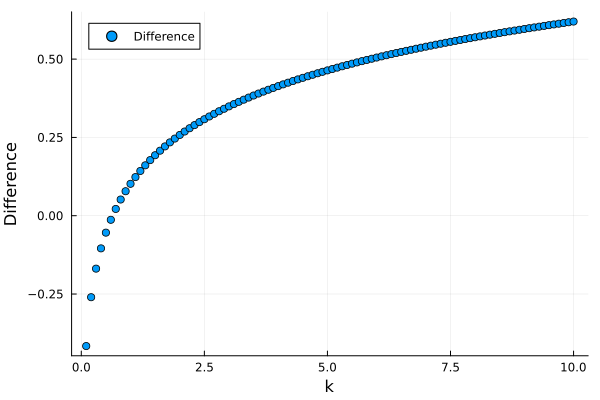

In [120]:
k = [i for i in LinRange(0.1, 10, 100)]
plot()
v_values = []
for k_value in k
    push!(v_values, v(k_value))
end
minimum_values = []
for k_value in k
    max, k_prime_optimal = minimiser(k_value)
    push!(minimum_values, max)
end
difference = minimum_values .- v_values
scatter!([k], [difference], label="Difference", xlabel="k", ylabel="Difference")

Part d

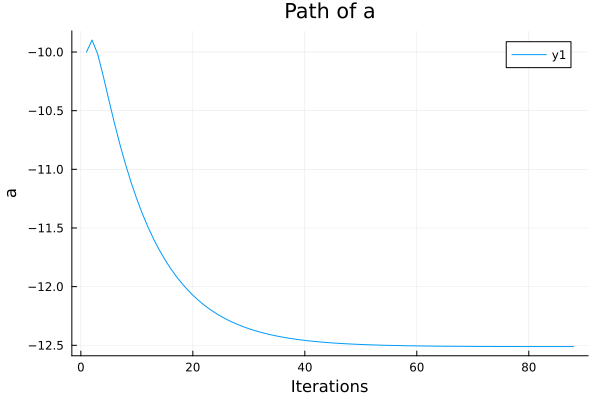

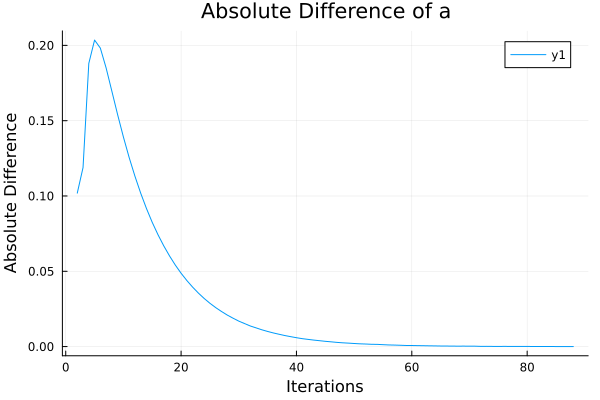

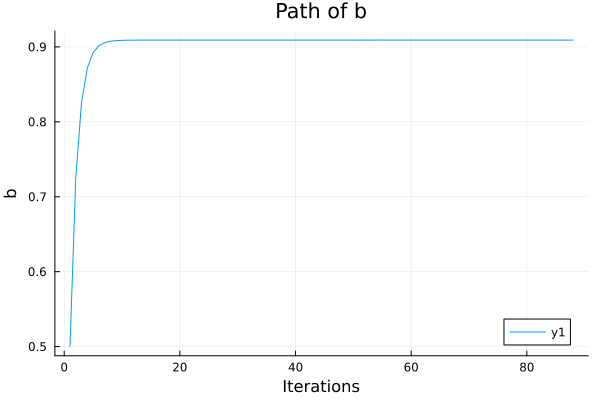

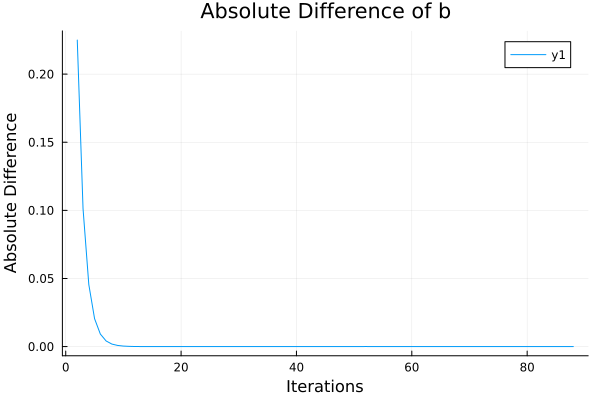

In [121]:
function optimization(a_0, b_0)
    k = [i for i in LinRange(0.1, 10, 5)]
    a_i = [a_0]
    b_i = [b_0]

    tolerance = 1e-10  # Increase the tolerance value for more iterations
    iteration = 1

    while true
        v_i = []
        for k_value in k
            max, _ = minimiser(k_value, a=a_i[iteration], b=b_i[iteration])
            push!(v_i, max)
        end
        
        function_to_minimise = (params) -> sum((v_i .- params[1] .- params[2] .* log.(k)).^2)

        result = optimize(function_to_minimise, [a_i[iteration], b_i[iteration]])
        push!(a_i, result.minimizer[1])
        push!(b_i, result.minimizer[2])
        
        if abs(a_i[iteration + 1] - a_i[iteration]) < tolerance && abs(b_i[iteration + 1] - b_i[iteration]) < tolerance
            break
        end
        
        iteration += 1
    end
    return a_i, b_i
end

a_0 = -10.0
b_0 = 0.5

a, b = optimization(a_0, b_0)
iterations = [i for i in 1:length(a)]
# Plot a
p1 = plot(iterations, a, xlabel="Iterations", ylabel="a", title="Path of a")

# Plot the absolute difference of a
p2 = plot(iterations[2:end], abs.(a[2:end] .- a[1:end-1]), xlabel="Iterations", ylabel="Absolute Difference", title="Absolute Difference of a")

# Plot b
p3 = plot(iterations, b, xlabel="Iterations", ylabel="b", title="Path of b")

# Plot the absolute difference of b
p4 = plot(iterations[2:end], abs.(b[2:end] .- b[1:end-1]), xlabel="Iterations", ylabel="Absolute Difference", title="Absolute Difference of b")


# Display each plot separately
display(p1)
display(p2)
display(p3)
display(p4)
